# Comparison: GapNet vs. Vanilla

In this tutorial we follow the same steps explaned in the gapnet tutorial notebook and compare them to a Vanilla neural network trained only on the subjects without missing values.

GapNet is an alternative deep-learning training approach that can use highly incomplete datasets. This is the code for the arXiv preprint 2107.00429  [Neural Network Training with Highly Incomplete Datasets](https://arxiv.org/abs/2107.00429).

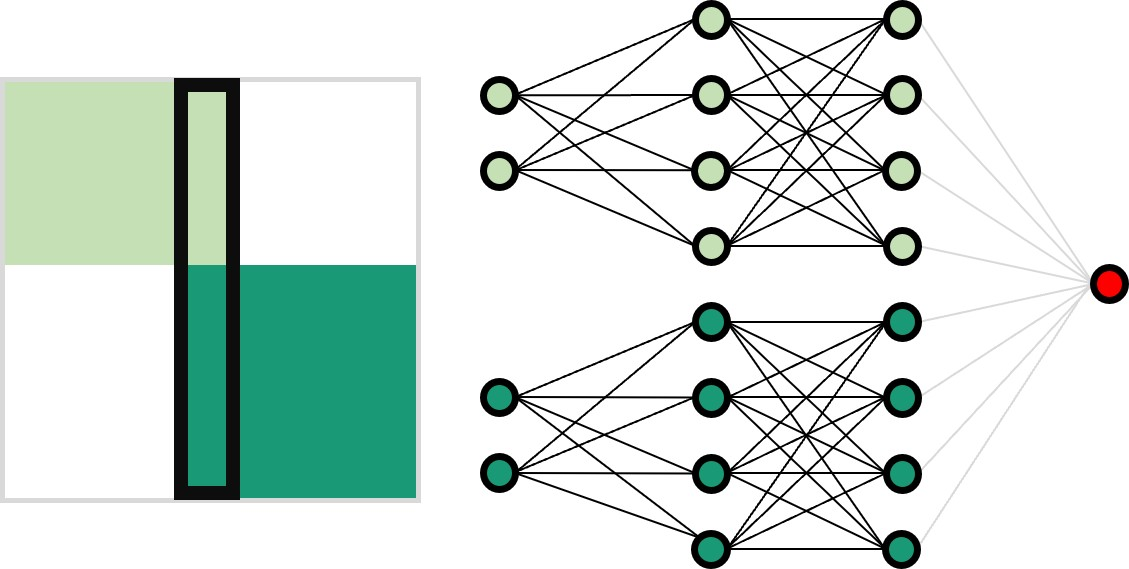

In [1]:
# Architecture of the GapNet
from IPython.display import Image
Image("assets/Gapnet.jpg", width = 500)

The figure shows a schematic representation of the dataset (on the left) and the GapNet approach (on the right) where the training takes place in two stages, where the connectors in black are trained in the first stage and the connectors in gray are trained in the second one.

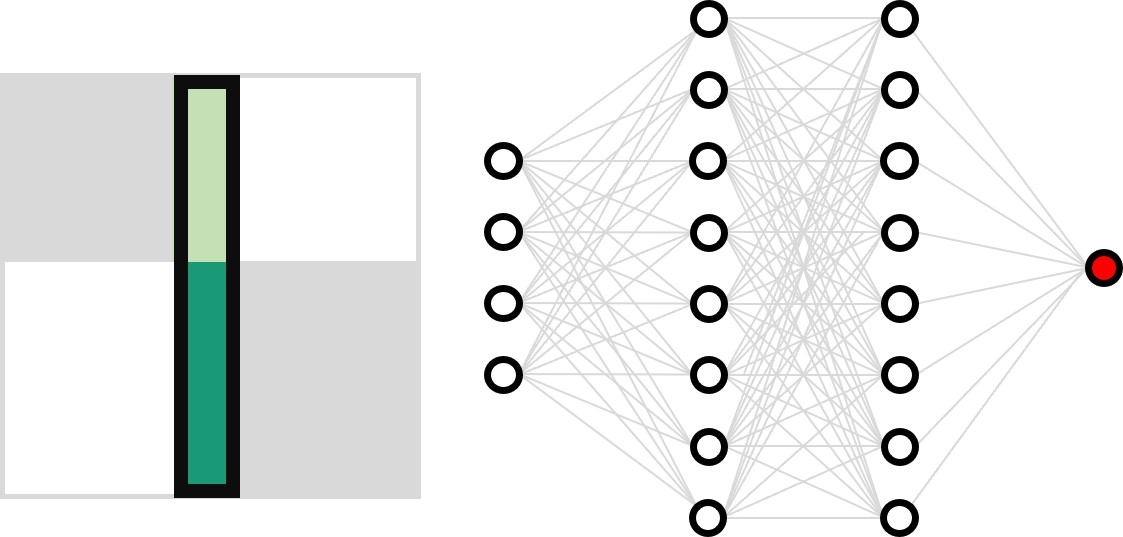

In [2]:
# Architecture of the Vanilla
from IPython.display import Image
Image("assets/Vanilla.jpg", width = 500)

The figure shows a schematic representation of the dataset (on the left) and the Vanilla neural network (on the right). Only the complete cases are used for Vanilla model. 

## Initialization

FIrst thing first, we load the main gapnet functions

In [3]:
from src import gapnet as gapnet

## Load the dataset

We provide an example dataset adapted from the the simulated dataset [Madelon](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=madelon). We provide two files: one including the inputs "X.npy" and one with the targets "Y.npy".

The dataset consists of 1000 subjects of which only 100 have all 40 features.

In [4]:
from numpy import isnan, load

X = load('data/X.npy') 
Y = load('data/Y.npy')

print("Number of features {}".format(X.shape[1]))
print("Number of subjects {}".format(X.shape[0]))

Number of features 40
Number of subjects 1000


## Generate models

Now, it is time to build both gapnet and vanilla model.

It requires first of all to define an object that will include all gapnet elements, and is defined as
gapnet_model = gapnet.generate_gapnet_model()
vanilla_model = gapnet.generate_vanilla_model()

Afterwards, the build_model function is required to introduce the gapnet neural network architecture.
gapnet_model.build_model()
vanilla_model.build_model()

Now, the modes are ready to be trained. Use the following functions to take as inputs the training and validation sets.
gapnet_model.train_first_stage(X_train, Y_train, X_val, Y_val)
gapnet_model.train_second_stage(X_train, Y_train, X_val, Y_val)
vanilla_model.train_single_stage(X_overlap, Y_overlap, X_val, Y_val)


In [5]:
vanilla_model = gapnet.generate_vanilla_model(n_feature = X.shape[1],n_classes = 2)
vanilla_model.build_model(show_summary=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3280      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 162       
Total params: 9,922
Trainable params: 9,922
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
gapnet_model = gapnet.generate_gapnet_model(cluster_sizes = [25,15], n_feature = X.shape[1],n_classes = 2)
gapnet_model.build_model(show_summary=True)

Generating the 1 neural network model ... 
Generating the 2 neural network model ... 
Generating the final gapnet model ... 
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 25)]         0           []                               
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 15)]         0           []                               
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 50)           1300        ['input_4[0][0]']                
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           480         ['i

## Train the models

In [7]:
num_trials = 5
for i in range(num_trials):
    i = i + 1
    print("\n\nTraining process of trial #{} is starting...".format(i))
    
    vanilla_model.build_model()
    gapnet_model.build_model()
    
    # preprocess the dataset
    X_train_overall, Y_train_overall, X_train, Y_train, X_val, Y_val = gapnet.preprocess_with_missing_data(X, Y)
    
    # train vanilla
    vanilla_model.train_single_stage(X_train, Y_train, X_val, Y_val)
    
    # train gapnet
    gapnet_model.train_first_stage(X_train_overall, Y_train_overall, X_val, Y_val)
    gapnet_model.train_second_stage(X_train, Y_train, X_val, Y_val)



Training process of trial #1 is starting...
Generating the 1 neural network model ... 
Generating the 2 neural network model ... 
Generating the final gapnet model ... 
Training process of vanilla is done.
Training process of first stage is done.
Training process of second stage is done.


Training process of trial #2 is starting...
Generating the 1 neural network model ... 
Generating the 2 neural network model ... 
Generating the final gapnet model ... 
Training process of vanilla is done.
Training process of first stage is done.
Training process of second stage is done.


Training process of trial #3 is starting...
Generating the 1 neural network model ... 
Generating the 2 neural network model ... 
Generating the final gapnet model ... 
Training process of vanilla is done.
Training process of first stage is done.
Training process of second stage is done.


Training process of trial #4 is starting...
Generating the 1 neural network model ... 
Generating the 2 neural network model 

In [8]:
gapnet.present_results(vanilla_model)

Results :
best_epochs [21, 26, 1, 10, 8]
train_accuracy 0.743+/-0.089 : [0.775 0.85  0.58  0.75  0.762]
val_accuracy 0.580+/-0.117 : [0.6 0.5 0.5 0.8 0.5]
val_auc 0.655+/-0.051 : [0.697 0.636 0.586 0.727 0.626]
val_sens 0.514+/-0.118 : [0.556 0.444 0.4   0.727 0.444]
val_spec 0.630+/-0.135 : [0.636 0.545 0.533 0.889 0.545]
val_prec 0.511+/-0.218 : [0.556 0.444 0.222 0.889 0.444]


In [9]:
gapnet.present_results(gapnet_model)

Results :
best_epochs [449, 178, 437, 355, 185]
train_accuracy 0.898+/-0.060 : [0.863 0.925 0.975 0.925 0.8  ]
val_accuracy 0.890+/-0.058 : [0.9  0.95 0.95 0.85 0.8 ]
val_auc 0.958+/-0.008 : [0.949 0.949 0.96  0.96  0.97 ]
val_sens 0.829+/-0.065 : [0.818 0.9   0.9   0.8   0.727]
val_spec 0.958+/-0.052 : [1.    1.    1.    0.9   0.889]
val_prec 0.956+/-0.054 : [1.    1.    1.    0.889 0.889]


## Compare the performances

After training the gapnet, it is possible to show the results by plotting the ROC curve, the confusion matrix, the loss, precision and recall functions along the training.

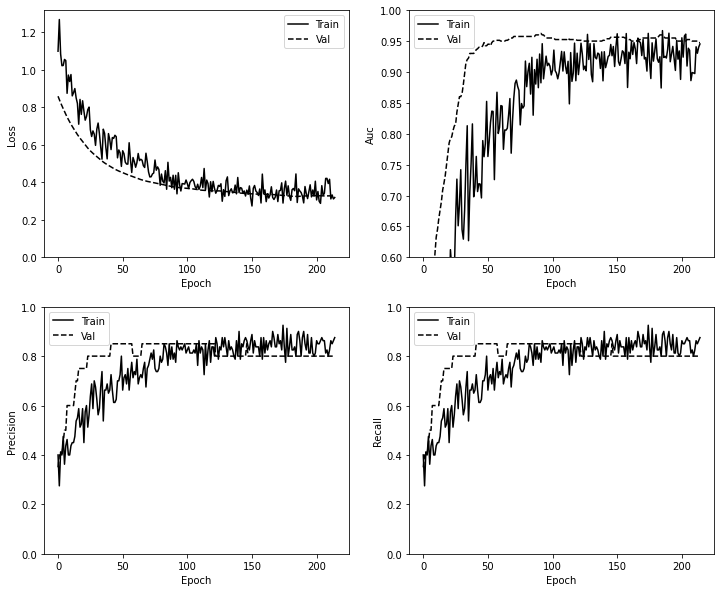

In [10]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 10)

# show training progress of gapnet
gapnet.plot_metrics(gapnet_model.history['gapnet'])

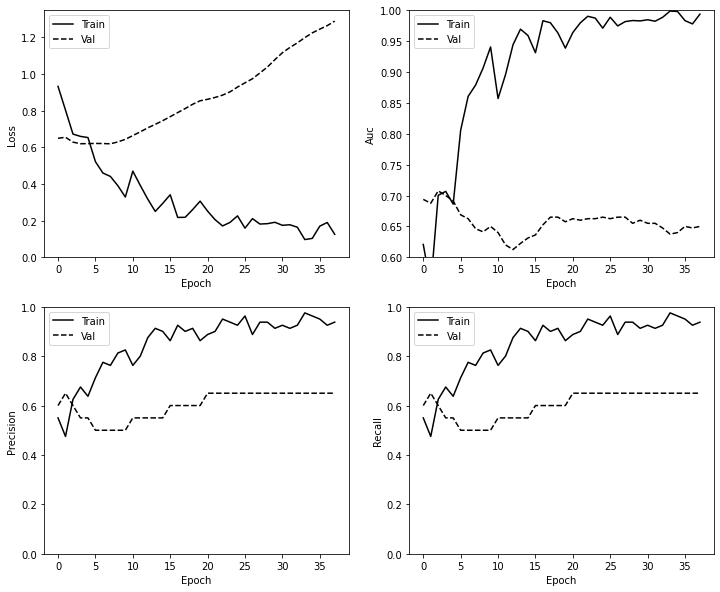

In [11]:
# show training progress of vanilla
gapnet.plot_metrics(vanilla_model.history)

In [12]:
from sklearn.metrics import roc_auc_score
print('AUC-ROC for the GapNet structure: {:.3f}'.format(roc_auc_score(gapnet_model.val_y_labels, gapnet_model.val_y_preds)))
print('AUC-ROC for the Vanilla structure: {:.3f}'.format(roc_auc_score(vanilla_model.val_y_labels, vanilla_model.val_y_preds)))

AUC-ROC for the GapNet structure: 0.957
AUC-ROC for the Vanilla structure: 0.663


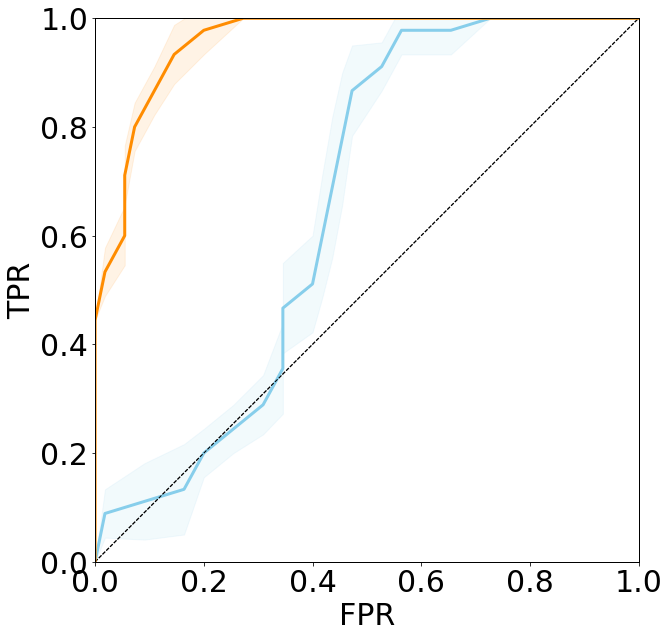

In [13]:
# show roc curve of both models
gapnet.plot_roc_avg("vanilla", vanilla_model.val_y_labels, vanilla_model.val_y_preds, num_trials, linestyle='solid', color='skyblue')
gapnet.plot_roc_avg("gapnet", gapnet_model.val_y_labels, gapnet_model.val_y_preds, num_trials, linestyle='solid', color='darkorange')

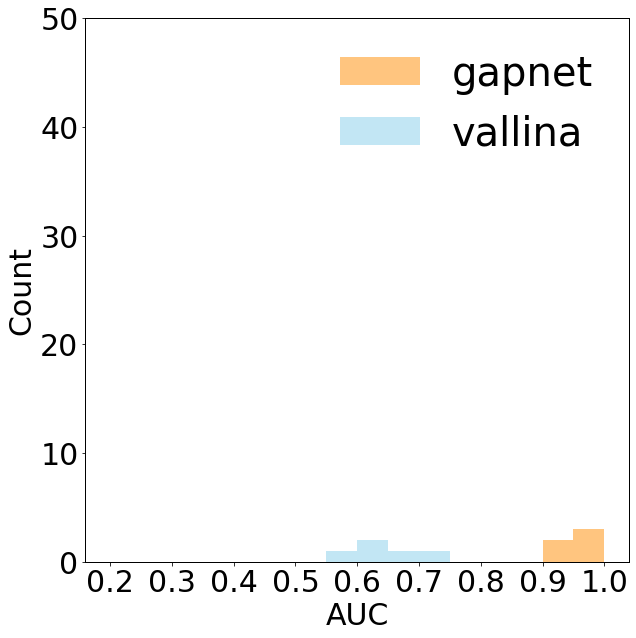

In [14]:
# show histogram for both models
gapnet.plot_hist(gapnet_model.val_aucs, 'gapnet', color='darkorange', alpha=0.5)
gapnet.plot_hist(vanilla_model.val_aucs, 'vallina', color='skyblue', alpha=0.5)

Legitimate Transactions Detected (True Negatives):  46
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  2
Fraudulent Transactions Detected (True Positives):  43
Total Fraudulent Transactions:  45


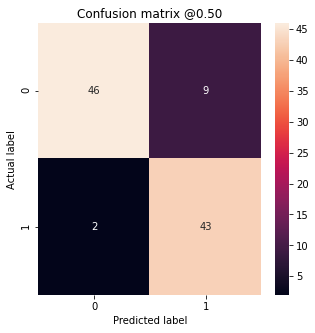

In [15]:
# show confusion matrix for gapnet
gapnet.plot_cm(gapnet_model.val_y_labels, gapnet_model.val_y_preds, 0.5)

Legitimate Transactions Detected (True Negatives):  35
Legitimate Transactions Incorrectly Detected (False Positives):  20
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  23
Total Fraudulent Transactions:  45


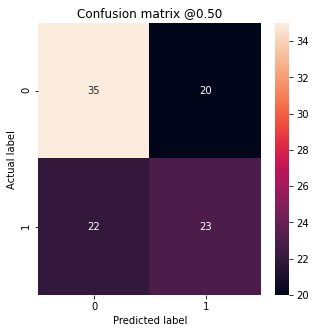

In [16]:
# show confusion matrix for vanilla
gapnet.plot_cm(vanilla_model.val_y_labels, vanilla_model.val_y_preds, 0.5)